In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
points = [
(1,1), (3,3), (3,4), (7,6), (9,10), (10,3),
(11,5), (13,1), (13,7), (14,9), (16,2), (17,0), (17,9), (18,10), (20,8),
(25,2), (25,5),
(34,4), (36,5), (36,7),
(41,3), (41,7), (42,6), (45,3),
(52,5), (52,8), (53,5), (54,6), (56,8), (60,5),

(1,17), (2,20),
(11,18),(14,18),(16,17),(16,19),(17,19),(19,19),
(22,18),(22,19),(23,16),(23,20),(24,11),(24,12),(25,12),
(31,15),(32,12),(33,20),(34,17),(38,13),
(41,18),(42,14),(43,20),(44,13),(45,11),(46,11),(50,14),
(51,11),(53,10),(54,11),(55,19),

(4,23),(4,29),(5,21),(8,29),(9,24),(9,27),(10,24),
(11,28),(11,29),(12,26),(12,29),(14,26),(18,23),
(23,23),(25,25),(28,24),(29,27),
(32,24),(39,29),(40,22),(40,29),
(42,24),(42,30),(43,30),(45,22),(46,30),(47,22),(48,28),(49,21),
(53,27),(58,21),(58,26),

(0,39),(1,34),(1,36),(2,36),(3,38),(4,33),
(15,40),(17,37),(20,39),
(24,36),(27,35),
(31,40),(33,31),(34,35),(35,35),(35,34),(37,34),(37,37),
(46,37),(49,32),
(51,34),(57,37),(59,34),

(3,47),(5,42),(10,41),(7,50),
(11,50),(12,49),(13,41),(14,48),
(22,43),(27,44),
(34,45),(35,45),(36,43),(38,47),
(46,43),(49,44),(50,48),
(51,45),(53,45),

(2,51),(3,51),(5,53),(5,56),(6,51),(8,54),(9,54),(9,56),
(11,59),(12,53),(15,60),(20,54),
(21,52),(24,59),(25,53),(25,56),(26,57),(26,57),(30,52),(30,57),
(33,54),(34,57),(35,59),
(50,53),(50,54),
(53,51),(53,55),(54,53),(55,59),(58,58),

(1,63),(2,64),(6,68),(8,63),
(12,70),(14,63),(17,63),(19,70),
(28,61),(28,67),(30,63),
(31,62),(39,61),
(43,66),(45,69),(46,65),(48,66),(49,70),
(52,69),

(2,79),(6,75),(10,76),
(18,79),(19,79),(20,73),
(21,76),(23,71),(23,79),(28,77),(29,72),(29,73),
(43,73),(43,76),(48,73),(49,72),(49,73),
(51,72),(51,78),(53,72),(53,74),(59,74),

(11,88),(13,88),(14,82),
(23,84),(24,83),(30,87),
(33,86),(40,88),(40,90),
(48,86),(48,90),
(51,90),(55,84),(57,83),
(3,93),(7,96),(10,96),
(11,97),(13,97),(15,93),(15,95),(17,95),
(24,93),(25,95),(26,98),(29,92),
(32,94),(38,96),(39,91),
(48,93),(49,96),
(56,92),(57,93),(58,94)
]

In [4]:
Xs, Ys = zip(*points)

In [5]:
import matplotlib.pyplot as plt
import matplotlib

In [6]:
def plot_trip(Xs, Ys, X0=Xs, Y0=Ys, draw_l1=True, annotate=True,
             my_canvas=None):
    if my_canvas is None:
        fig = plt.figure(figsize = (6*1.5, 10*1.5))
        ax = fig.add_subplot(1, 1, 1)
    else:
        fig = my_canvas['fig']
        ax = my_canvas['ax']
    
    x0, y0 = Xs[0], Ys[0]
    # find mid-point if draw L1
    if draw_l1:
        X_draw, Y_draw = [x0], [y0]
        for i in range(1, len(Xs)):
            x1, y1 = Xs[i], Ys[i]
            # M1 middle point for drawing
            x_mid, y_mid = x1, y0
            X_draw.append(x_mid)
            Y_draw.append(y_mid)
            X_draw.append(x1)
            Y_draw.append(y1)
            x0, y0 = x1, y1
        ax.plot(X_draw, Y_draw, '-')
    else:
        ax.plot(Xs, Ys, '-')
    ax.set_xticks(np.arange(0, 61, 10))
    ax.set_xticks(np.arange(0, 61, 5), minor=True)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_yticks(np.arange(0, 101, 5), minor=True)

    ax.grid()
    plt.axis('equal')
    if annotate:
        for i in range(len(X0)):
            ax.annotate(i, (X0[i], Y0[i]))
    plt.axis('tight')
    return fig, ax

In [7]:
def plot_given_solution(my_plan, draw_l1=True, annotate=False,
                       my_canvas=None):
    Xs = []
    Ys = []
    for pt in my_plan:
        Xs.append(point_dict[pt][0])
        Ys.append(point_dict[pt][1])
    # back to origin point
    Xs.append(Xs[0])
    Ys.append(Ys[0])
    return plot_trip(Xs, Ys, draw_l1=draw_l1, annotate=annotate,
                    my_canvas=my_canvas)

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

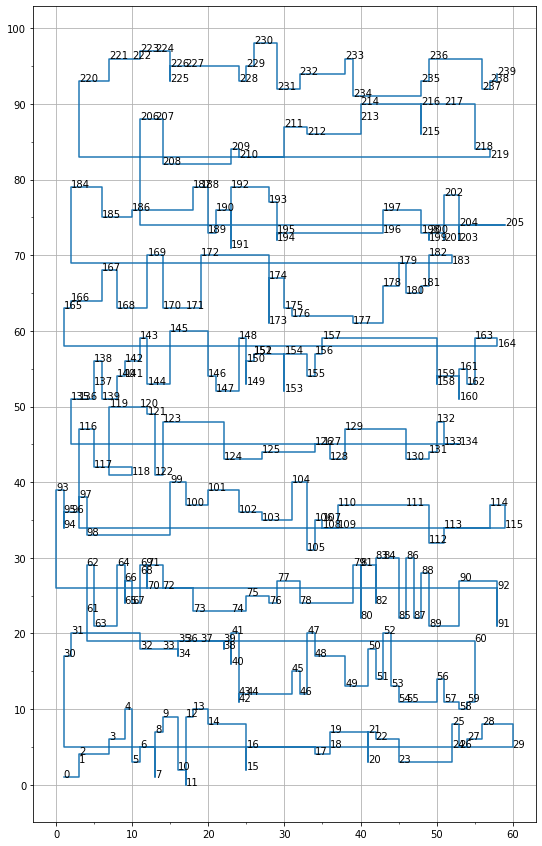

In [8]:
plot_trip(Xs, Ys)

In [9]:
point_dict = {i:pt for i, pt in enumerate(points)}

In [10]:
# let the start solution be 0-239 in order, starting at 0, back to 0.
# use Manhattan distance
plan_order = list(range(0,240))

def get_distance(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

def get_path_length(pts_order, point_dict=point_dict):
    p_start = point_dict[pts_order[0]]
    p0 = p_start
    
    all_dist = 0
    for i in range(1, len(pts_order)):
        p1 = point_dict[pts_order[i]]
        all_dist += get_distance(p0[0], p0[1], p1[0], p1[1])
        p0 = p1
    all_dist += get_distance(p0[0], p0[1], p_start[0], p_start[1])
    return all_dist

In [11]:
all_dist = get_path_length(plan_order, point_dict)
print(all_dist)

2014


# An approximate algorithm
1. Create network
2. Compute distance matrix between any two points (O(n^2))
3. Get minimum spanning tree (O(n))
4. Skip visited places and generate plan (O(n))


This algorithm at most twice woser than the best case

In [12]:
import networkx as nx

In [13]:
X = nx.Graph()
X.add_nodes_from(point_dict.keys())

# add nodes
for n, coords in point_dict.items():
    X.nodes[n]['pos'] = coords
# add edges
for i in range(240):
    for j in range(240):
        x, y = point_dict[i], point_dict[j]
        w = get_distance(x[0], x[1], y[0], y[1])
        X.add_edge(i, j, weight=w)

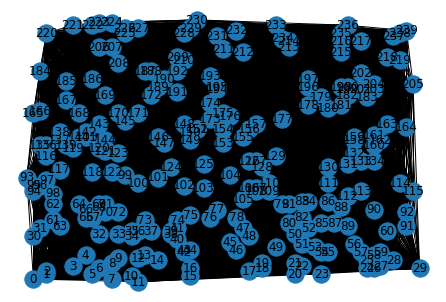

In [14]:
nx.draw(X, point_dict, with_labels=True)
plt.show()

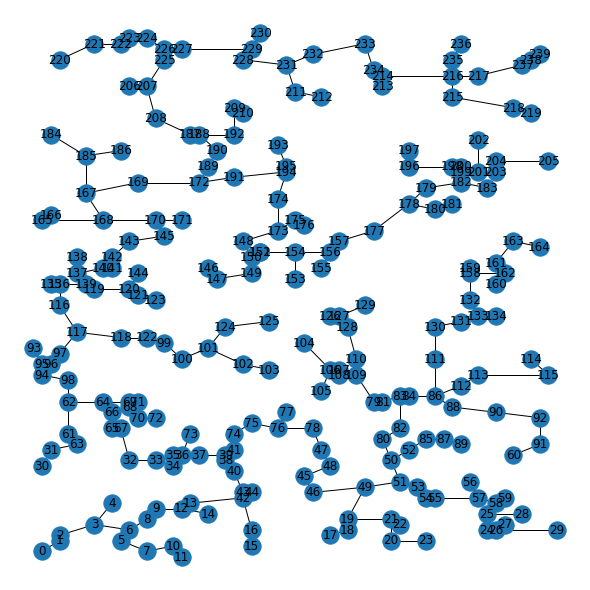

In [15]:
fig = plt.figure(figsize = (8, 8))
T = nx.minimum_spanning_tree(X)
nx.draw(T, point_dict, with_labels=True)
plt.show()

In [16]:
# get the upper bound
T.size(weight="weight") * 2

1898.0

In [17]:
1898/2

949.0

Let's generate the plan!

In [18]:
def get_plan(G, source=0):
    # dfs travel
    edges = []
    for edge in nx.dfs_edges(T, source=source):
        edges.append(edge)
    # skip visited city
    plan = []
    for edge in edges:
        if edge[0] not in plan:
            plan.append(edge[0])
        if edge[1] not in plan:
            plan.append(edge[1])
    return plan

In [19]:
mst_approx_plan = []
key_sources = [0, 4, 11, 15, 23, 29, 60, 114, 164,
              129, 103, 30, 93, 123, 185, 221, 231,
              213, 220, 239, 237, 153, 146, 101, 86]
for source in key_sources:
    mst_approx_plan.append(get_plan(T, source=source))

In [20]:
print(len(mst_approx_plan))
print(len(key_sources))

25
25


Try dfs from different source 

In [21]:
for i, p in enumerate(mst_approx_plan):
    print(i, get_path_length(p, point_dict))

0 1490
1 1498
2 1498
3 1482
4 1496
5 1496
6 1476
7 1468
8 1462
9 1500
10 1442
11 1490
12 1496
13 1474
14 1524
15 1510
16 1504
17 1512
18 1510
19 1516
20 1518
21 1544
22 1536
23 1448
24 1484


In [22]:
1544/2

772.0

In [23]:
X_mst = []
Y_mst = []
for p in mst_approx_plan[10]:
    X_mst.append(point_dict[p][0])
    Y_mst.append(point_dict[p][1])
X_mst.append(X_mst[0])
Y_mst.append(Y_mst[0])

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

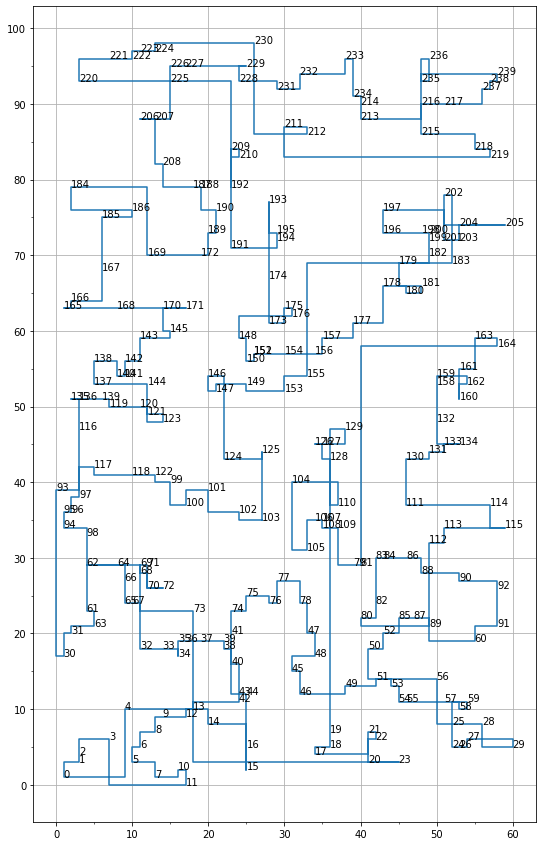

In [24]:
plot_trip(X_mst, Y_mst)

For mutation, only limit the number of mutation to k neighbors using KNN.

In [25]:
from sklearn.neighbors import NearestNeighbors
coords = list(zip(Xs, Ys))
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree', metric="manhattan").fit(coords)
distances, indices = nbrs.kneighbors(coords)

In [26]:
print(indices)

[[  0   1   2 ...  30  10   4]
 [  1   2   0 ...   4  10   8]
 [  2   1   0 ...   8   7  30]
 ...
 [237 238 239 ... 216 236 215]
 [238 237 239 ... 236 216 215]
 [239 238 237 ... 218 216 215]]


In [27]:
print(distances)

[[ 0.  4.  5. ... 16. 16. 17.]
 [ 0.  1.  4. ... 13. 14. 14.]
 [ 0.  1.  5. ... 13. 13. 15.]
 ...
 [ 0.  2.  4. ... 10. 11. 14.]
 [ 0.  2.  2. ... 11. 12. 16.]
 [ 0.  2.  4. ... 13. 14. 18.]]


In [28]:
# get probability e^(-d)/ sum(e^(-d))
np.set_printoptions(precision=3)

d = np.exp(-distances/20)
print(d)

prob = d / np.sum(d, axis = 1).reshape(-1, 1)
print(prob)

[[1.    0.819 0.779 ... 0.449 0.449 0.427]
 [1.    0.951 0.819 ... 0.522 0.497 0.497]
 [1.    0.951 0.779 ... 0.522 0.522 0.472]
 ...
 [1.    0.905 0.819 ... 0.607 0.577 0.497]
 [1.    0.905 0.905 ... 0.577 0.549 0.449]
 [1.    0.905 0.819 ... 0.522 0.497 0.407]]
[[0.163 0.134 0.127 ... 0.073 0.073 0.07 ]
 [0.146 0.139 0.12  ... 0.076 0.072 0.072]
 [0.146 0.139 0.114 ... 0.076 0.076 0.069]
 ...
 [0.143 0.129 0.117 ... 0.087 0.083 0.071]
 [0.146 0.132 0.132 ... 0.084 0.08  0.066]
 [0.156 0.141 0.127 ... 0.081 0.077 0.063]]


# Use genetic algorithm to find better travel time
1. Initial Population– Initialize the population randomly based on the data.
2. Fitness function– Find the fitness value of the each of the chromosomes(a chromosome is a set of parameters which define a proposed solution to the problem that the genetic algorithm is trying to solve)

3. Selection– Select the best fitted chromosomes as parents to pass the genes for the next generation and create a new population

4. Cross-over– Create new set of chromosome by combining the parents and add them to new population set

5. Mutation– Perfrom mutation which alters one or more gene values in a chromosome in the new population set generated. Mutation helps in getting more diverse oppourtinity. Obtained population will be used in the next generation


In [29]:
import copy
import random

In [30]:
def initialization_of_population(size, n_feat):
    # size: population size; n_feat: length of feature
    population = []
    for i in range(size):
        chromosome = list(range(240))
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [31]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        d = get_path_length(chromosome)
        scores.append(d)
    
    inds = np.argsort(scores)
    # return by ascending order in terms of score
    return list(np.array(scores)[inds]), list(np.array(population)[inds])

In [32]:
def selection(pop_after_fit, score_after_fit, n_parents):
    population_nextgen, score_nextgen = [], []
    # for each same fitness score, keep at most 3 samples
    curr_score, curr_count = score_after_fit[0], -1
    for i, p in enumerate(pop_after_fit):
        if len(score_nextgen) > n_parents:
            break
        if curr_score == score_after_fit[i]:
            curr_count += 1
        else:
            curr_count = 0
            curr_score = score_after_fit[i]
        if curr_count < int(0.20 * n_parents) and len(population_nextgen) < n_parents:
            population_nextgen.append(pop_after_fit[i])
            score_nextgen.append(score_after_fit[i])
    # for i in range(n_parents):
    #    population_nextgen.append(pop_after_fit[i])
    
    # randomly add a few items only if not enough samples
    # print('find #:', len(score_nextgen))
    n_left = n_parents - len(score_nextgen)
    if n_left > 0:
        for i in range(n_left):
            j = random.randint(0, len(pop_after_fit)-1)
            population_nextgen.append(pop_after_fit[j])
            score_nextgen.append(score_after_fit[j])
    return score_nextgen[:n_parents], population_nextgen[:n_parents]

In [69]:
def rotate_at_value(chromosome, start_value):
    i=0
    for i, v in enumerate(chromosome):
        if v == start_value:
            break
    if i != 0:
        chromosome = chromosome[i:] + chromosome[:i]
    return chromosome

def rotate_at_index_end(chromosome, i):
    # ratate index i to the end of the list
    if i != 0:
        chromosome = chromosome[i+1:] + chromosome[:i+1]
    return chromosome

def get_longest_cut(chromosome, point_dict=point_dict):
    if len(chromosome)==1:
        return 0
    # get the best second node to cut one chrmosome into two
    # the first cut is between node at index 0 and index (n-1)
    p0 = point_dict[chromosome[0]]
    cut1_ind, cut2_ind = 0, 0
    best_dist = 1e5
    cut_indexes = []
    for i in range(len(chromosome)-1):
        p1 = point_dict[chromosome[i+1]]
        cur_dst = get_distance(p0[0], p0[1], p1[0], p1[1])
        if best_dist > cur_dst:
            best_dist = cur_dst
            cut_indexes.append(i)
        p0 = p1
    return cut_indexes[-1]


def crossover(pop_after_select, n_feat):
    # expand pop for 3 times
    population_nextgen = copy.deepcopy(pop_after_select)
    # crossover. choose one parent as top 1/3 population
    for i in range(int(len(pop_after_select) / 3)):
        # randomly select the second parent
        j = random.randint(0, len(pop_after_select)-1)
        child1 = pop_after_select[i]
        child2 = pop_after_select[j]
        if not isinstance(child1, list):
            child1 = child1.tolist()
        if not isinstance(child2, list):
            child2 = child2.tolist()
        
        # decide break point s1 as one of the longest travel path
        s1 = get_longest_cut(child1)
        if s1==0: # if s1=0, two cuts at same position, randomly choose the second one
            s1 = random.randint(1, n_feat-2)
        # first s1 nodes to keep in child1
        r_nodes = [c for c in child2 if c in child1[s1:]]
        l_nodes = [c for c in child2 if c in child1[:s1]]
        # rotate l_nodes and r_nodes
        r_c1 = get_longest_cut(r_nodes)
        l_c1 = get_longest_cut(l_nodes)
        if r_c1==0: # if s1=0, two cuts at same position, randomly choose the second one
            r_c1 = random.randint(1, n_feat-2)
        if l_c1==0: # if s1=0, two cuts at same position, randomly choose the second one
            l_c1 = random.randint(1, n_feat-2)
        r_nodes = rotate_at_index_end(r_nodes, r_c1)
        l_nodes = rotate_at_index_end(l_nodes, l_c1)
        # 4 possible children
        child1 = child1[:s1] + r_nodes
        child2 = l_nodes + child1[s1:]
        child3 = child1[:s1] + r_nodes[::-1]
        child4 = l_nodes[::-1] + child1[s1:]
        population_nextgen.append(copy.deepcopy(child1))
        population_nextgen.append(copy.deepcopy(child2))
        population_nextgen.append(copy.deepcopy(child3))
        population_nextgen.append(copy.deepcopy(child4))
        
    return population_nextgen

In [50]:
from numpy.random import choice

def mutation(pop_after_cross, mutation_rate):
    # keep 20 parent + make 80 mutations
    population_nextgen = copy.deepcopy(pop_after_cross)
    # for w in range(0,10):
    for i in range(0, len(pop_after_cross)):
        c0 = pop_after_cross[i]
        if not isinstance(c0, list):
            c0 = c0.tolist()
        chromosome = copy.deepcopy(c0)
        # rotate before mutation randomly
        r = random.randint(0, len(chromosome)-1)
        c0 = chromosome[r:] + chromosome[:r]
        chromosome = copy.deepcopy(c0)
        for j in range(len(chromosome)):
            if random.random() < mutation_rate and j>=2:
                # swap j with j-1
                temp = chromosome[j-1]
                chromosome[j-1] = chromosome[j]
                chromosome[j] = temp
                population_nextgen.append(copy.deepcopy(chromosome))
                chromosome = copy.deepcopy(c0)
        
        chromosome = copy.deepcopy(c0)
        for j in range(len(chromosome)):
            if random.random() < mutation_rate and j>=2 and j <= len(chromosome)-2:
                # swap j with k, k corresponds to a neighbor
                k_id, k = choice(indices[j], p=prob[j]), 1
                for k, c_id in enumerate(chromosome):
                    if c_id == k_id:
                        break
                # print(k, k_id, chromosome[k])
                temp = chromosome[k]
                chromosome[k] = chromosome[j+1]
                chromosome[j+1] = temp
                population_nextgen.append(copy.deepcopy(chromosome))
                chromosome = copy.deepcopy(c0)
        
        # another kind of swap (swap both ends for same chromosome)
        for j in range(len(chromosome)):
            if random.random() < mutation_rate and j>=2 and j <= len(chromosome)-2:
                # swap j with k, k corresponds to a neighbor
                k_id, k = choice(indices[j], p=prob[j]), 1
                for k, c_id in enumerate(chromosome):
                    if c_id == k_id:
                        break
                # print(k, k_id, chromosome[k])
                k, j = min(k,j), max(k,j)
                l, r = chromosome[:k], chromosome[j:]
                mid = chromosome[k:j]
                chromosome = l + mid[::-1] + r
                
                population_nextgen.append(copy.deepcopy(chromosome))
            
    return population_nextgen

In [45]:
def generations(size, n_feat, n_parents,
                mutation_rate, n_gen, init_population=None,
                verbose = True):
    best_chromo = []
    best_score  = []
    if init_population is not None:
        population_nextgen = init_population
    else:
        population_nextgen = initialization_of_population(size, n_feat)
    # step 2-5
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        scores, pop_after_sel = selection(pop_after_fit, scores, n_parents)
        if verbose:
            print('generation: {} ; original population: {}, after selection is: {}'\
                  .format(i, len(pop_after_fit), len(pop_after_sel)))
            print(scores[:17])
        if i % 50 == 0:
            print('generation: {} ; original population: {}, after selection is: {}'\
                  .format(i, len(pop_after_fit), len(pop_after_sel)))
            print(scores[:17])
        # print('pop_after_sel', pop_after_sel)
        pop_after_cross = crossover(pop_after_sel, n_feat)
        # print('pop_after_cross', len(pop_after_cross))
        population_nextgen = mutation(pop_after_cross, mutation_rate)
        # print('population_nextgen', len(population_nextgen))
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    last_chromo = population_nextgen
    return best_chromo, best_score, last_chromo

In [46]:
# initial populations for training
mother = mst_approx_plan * 2 + [plan_order] * 5
print(len(mother))

55


In [70]:
best_chromo, best_score, last_chromo = \
generations(size = 100, n_feat = 240, n_parents=50,
           mutation_rate=0.01, n_gen=100,
           init_population = mother)

generation: 0 ; original population: 55, after selection is: 50
[1442, 1442, 1448, 1448, 1462, 1462, 1468, 1468, 1474, 1474, 1476, 1476, 1482, 1482, 1484, 1484, 1490]
generation: 0 ; original population: 55, after selection is: 50
[1442, 1442, 1448, 1448, 1462, 1462, 1468, 1468, 1474, 1474, 1476, 1476, 1482, 1482, 1484, 1484, 1490]
generation: 1 ; original population: 923, after selection is: 50
[1434, 1442, 1442, 1446, 1448, 1448, 1448, 1448, 1450, 1450, 1450, 1452, 1452, 1454, 1454, 1456, 1458]
generation: 2 ; original population: 919, after selection is: 50
[1434, 1440, 1440, 1440, 1442, 1442, 1442, 1442, 1444, 1444, 1444, 1444, 1446, 1446, 1446, 1446, 1446]
generation: 3 ; original population: 911, after selection is: 50
[1434, 1434, 1436, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1442, 1442, 1442, 1442, 1442, 1442, 1442]
generation: 4 ; original population: 937, after selection is: 50
[1434, 1434, 1434, 1434, 1434, 1434, 1436, 1436, 1436, 1436, 1436, 1436, 1438, 1438, 1438, 1438, 

generation: 48 ; original population: 935, after selection is: 50
[1358, 1360, 1360, 1362, 1362, 1364, 1364, 1366, 1366, 1366, 1366, 1366, 1366, 1366, 1366, 1366, 1366]
generation: 49 ; original population: 924, after selection is: 50
[1358, 1360, 1360, 1360, 1360, 1360, 1360, 1362, 1362, 1362, 1362, 1364, 1364, 1364, 1364, 1366, 1366]
generation: 50 ; original population: 962, after selection is: 50
[1358, 1358, 1358, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1362, 1362, 1362, 1362]
generation: 50 ; original population: 962, after selection is: 50
[1358, 1358, 1358, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1362, 1362, 1362, 1362]
generation: 51 ; original population: 867, after selection is: 50
[1358, 1358, 1358, 1358, 1358, 1358, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1362]
generation: 52 ; original population: 925, after selection is: 50
[1356, 1356, 1358, 1358, 1358, 1358, 1358, 1358, 1358, 1358, 1358, 1358, 1360, 1360, 1360

generation: 96 ; original population: 914, after selection is: 50
[1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1336, 1336, 1336, 1336, 1336, 1336, 1336]
generation: 97 ; original population: 904, after selection is: 50
[1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1336, 1336, 1336, 1336, 1336, 1336, 1336]
generation: 98 ; original population: 916, after selection is: 50
[1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1336, 1336, 1336, 1336, 1336, 1336, 1336]
generation: 99 ; original population: 909, after selection is: 50
[1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1336, 1336, 1336, 1336, 1336, 1336, 1336]


In [71]:
best_records = [best_chromo[0], best_chromo[-1]]
best_scores = [best_score[0], best_score[-1]]

num_iter = 1

In [72]:
t0 = time.time()
while True:
    best_chromo, best_score, last_chromo = \
    generations(size = 100, n_feat = 240, n_parents=100,
               mutation_rate=0.01, n_gen=100,
               init_population = last_chromo, verbose = False)
    best_records.append(best_chromo[-1])
    best_scores.append(best_score[-1])
    # stop after running for an hour
    if time.time() - t0 > 3600:
        break

generation: 0 ; original population: 939, after selection is: 100
[1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334, 1334]
generation: 50 ; original population: 1916, after selection is: 100
[1318, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320, 1320]
generation: 0 ; original population: 1873, after selection is: 100
[1308, 1308, 1308, 1308, 1308, 1308, 1308, 1310, 1310, 1310, 1310, 1310, 1310, 1310, 1310, 1310, 1310]
generation: 50 ; original population: 1787, after selection is: 100
[1288, 1288, 1288, 1288, 1288, 1288, 1288, 1288, 1288, 1290, 1290, 1290, 1290, 1290, 1290, 1292, 1292]
generation: 0 ; original population: 1868, after selection is: 100
[1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258, 1258]
generation: 50 ; original population: 1930, after selection is: 100
[1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 12

KeyboardInterrupt: 

In [73]:
# plot the best result
best_records[-1]

array([ 27,  29,  28,  58,  59,  57,  55,  54,  23,  20,  22,  21,  19,
        18,  17,  46,  49,  50,  52,  87,  85,  80,  81,  79, 105, 106,
       107, 108, 109, 110, 104, 128, 129, 127, 126, 155, 153, 149, 146,
       147, 124, 125, 103, 102, 101, 100,  99, 122, 118, 117,  97,  96,
        95,  94,  98,  62,  64,  66,  68,  69,  71,  70,  72,  73,  74,
        75,  77,  76,  78,  47,  48,  45,  44,  43,  42,  16,  15,  10,
        11,   7,   6,   5,   1,   0,   2,   3,   4,   8,   9,  12,  13,
        14,  40,  38,  39,  41,  37,  36,  35,  34,  33,  32,  67,  65,
        61,  63,  31,  30,  93, 116, 136, 135, 139, 119, 120, 123, 121,
       144, 137, 138, 140, 141, 142, 143, 145, 171, 170, 168, 165, 166,
       167, 185, 184, 186, 169, 172, 189, 190, 188, 187, 208, 207, 206,
       220, 221, 222, 223, 224, 226, 225, 227, 228, 229, 230, 232, 233,
       234, 213, 214, 216, 217, 237, 238, 239, 236, 235, 215, 218, 219,
       212, 211, 231, 209, 210, 192, 193, 195, 194, 191, 174, 17

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

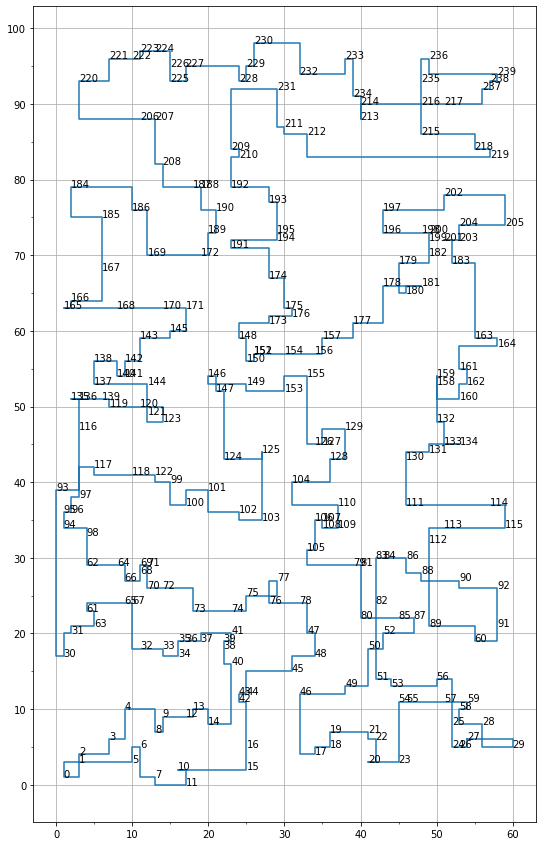

In [74]:
plot_given_solution(best_records[-1], draw_l1=True, annotate=True)

# Concurrently run genetic algorithm 10 times starting from random solution


In [41]:
# final target, use 14 cores in machine at same time to get different converge results
def run_iterate(data_dict):
    t0 = time.time()
    for k, v in data_dict.items():
        globals()[k] = v
    last_chromo = data_dict['last_chromo']
    best_records, best_scores = [], []
    
    while True:
        best_chromo, best_score, last_chromo = \
        generations(size = 100, n_feat = 240, n_parents=100,
                   mutation_rate=0.01, n_gen=100,
                   init_population = last_chromo, verbose = False)
        best_records.append(best_chromo[-1])
        best_scores.append(best_score[-1])
    
        if time.time() - t0 > 3600:
            return best_records, best_scores
    return best_records, best_scores

In [72]:
from concurrent.futures import ProcessPoolExecutor

def pool_STP_map(nprocs, **kwargs):
    locals().update(data_dict)
    # Let the executor divide the work among processes by using 'map'.
    with ProcessPoolExecutor(max_workers=nprocs) as executor:
        rets = executor.map(run_iterate, [chromo]*nprocs)
        return rets

In [104]:
# naive random start
tot_random = [random.sample(list(range(0,240)), 240) for i in range(50)]
print(tot_random[0])

[145, 133, 70, 80, 192, 82, 125, 38, 208, 123, 47, 1, 171, 43, 206, 178, 28, 95, 207, 2, 29, 46, 57, 168, 73, 232, 51, 92, 6, 7, 49, 227, 53, 13, 179, 134, 225, 163, 187, 156, 203, 209, 87, 83, 55, 107, 190, 77, 199, 79, 184, 62, 118, 44, 40, 81, 231, 48, 174, 25, 195, 91, 237, 238, 210, 32, 141, 173, 36, 61, 191, 106, 130, 228, 185, 37, 144, 8, 56, 17, 161, 217, 97, 143, 102, 216, 147, 104, 90, 186, 63, 99, 219, 132, 226, 116, 114, 50, 142, 198, 139, 54, 146, 214, 120, 85, 65, 176, 26, 45, 27, 135, 182, 138, 137, 18, 177, 67, 230, 5, 64, 194, 155, 108, 12, 89, 197, 183, 71, 10, 188, 149, 75, 31, 72, 105, 112, 3, 222, 201, 229, 131, 213, 239, 52, 4, 22, 86, 167, 34, 157, 164, 204, 121, 152, 136, 110, 30, 221, 78, 115, 166, 162, 165, 160, 127, 169, 181, 154, 158, 24, 189, 218, 150, 175, 200, 94, 211, 224, 98, 202, 39, 68, 128, 170, 236, 96, 233, 234, 76, 84, 122, 140, 88, 23, 124, 117, 58, 212, 15, 148, 60, 109, 0, 11, 41, 100, 66, 223, 59, 153, 196, 69, 180, 9, 74, 113, 14, 235, 159, 3

In [112]:
import test
import time
if __name__ == '__main__':
    t0 = time.time()
    data_dict = {'points':points, 'Xs':Xs, 'Ys':Ys, 'point_dict':point_dict,
                 'coords':coords, 'nbrs':nbrs,
                 'distances':distances, 'indices':indices, 'prob':prob, 'last_chromo':tot_random}
    rets = [r for r in test.pool_STP_map(10, data_dict)]
    t1 = time.time()
    print('It takes {} minutes to finish running the code'.format((t1-t0)/60))

It takes 122.05334188143412 minutes to finish running the code


In [108]:
len(rets)

10

In [116]:
# print final score of 10 processes
for i in range(10):
    print(len(rets[i][1]))
    print(rets[i][1][-1])
    print()

2300
1204

2300
1220

2300
1258

2300
1200

2300
1262

2300
1220

2300
1228

2300
1246

2300
1218

2300
1236



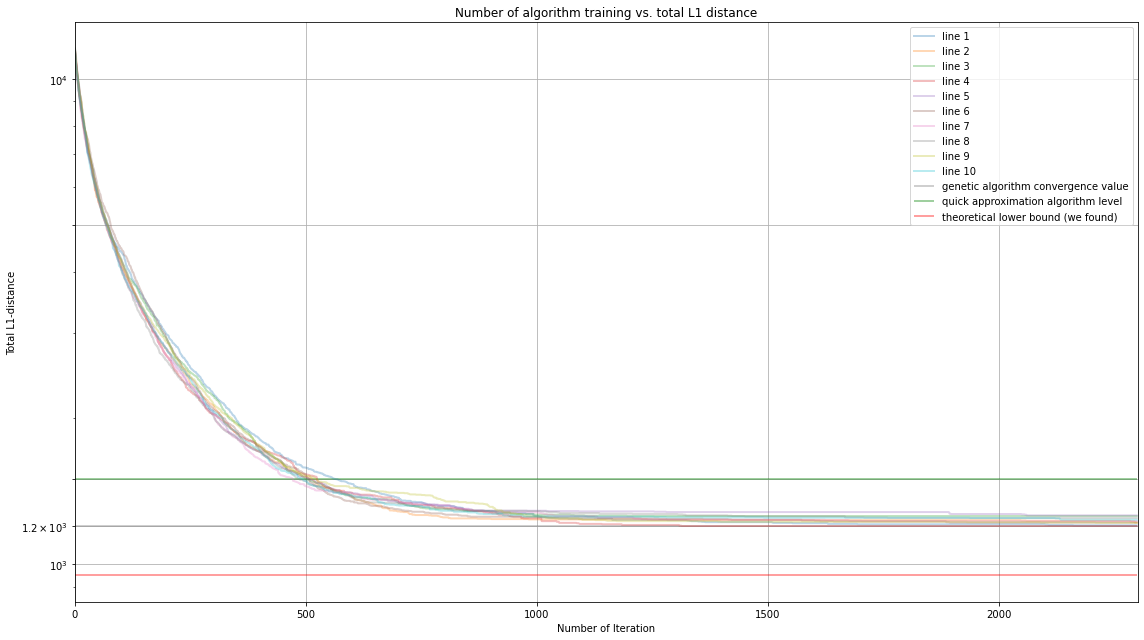

In [156]:
# plot evolution of random process
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
for i in range(10):
    ax.plot(range(len(rets[i][1])), rets[i][1], label = 'line {}'.format(i+1), alpha = 0.3, linewidth=2)
ax.set_yscale('log')
ax.set_xlabel('Number of Iteration')
ax.set_xlim(0,2301)
ax.set_ylabel('Total L1-distance')
ax.set_yticks([500, 772, 1000, 1200, 1500, 5000, 10000])
ax.grid()

ax.hlines(y=1200, xmin=0, xmax=2300, label = 'genetic algorithm convergence value', color="grey", alpha = 0.5)
ax.hlines(y=1500, xmin=0, xmax=2300, label = 'quick approximation algorithm level',
          color="green", alpha = 0.5)
ax.hlines(y=949, xmin=0, xmax=2300, label = 'theoretical lower bound (we found)',
          color="red", alpha = 0.5)

plt.title("Number of algorithm training vs. total L1 distance")
plt.legend()
plt.tight_layout()

Plot a side by side figure for both decaying curve and final plot side by side

In [251]:
# plot evolution of random process
import matplotlib.pyplot as plt
from matplotlib import gridspec

record_1 = rets[0]

In [262]:
def frame_animation(frame_num, record):
    fig = plt.figure(figsize=(20, 9))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
    ax0, ax1 = plt.subplot(gs[0]), plt.subplot(gs[1])
    # draw map
    my_canvas = {'fig':fig, 'ax':ax0}
    fig, ax0 = plot_given_solution(record[0][frame_num],
                                   draw_l1=False, annotate=False,
                                   my_canvas=my_canvas)

    # draw picture
    ax1.plot(range(len(record[1])), record[1], label = 'line {}'.format(0+1),
            alpha = 0.8, linewidth=5)
    ax1.set_xlabel('Number of Iteration')
    ax1.set_xlim(0.0, 2301.0)
    ax1.set_ylim(500, 1.1e4)
    ax1.set_ylabel('Total L1-distance')
    ax1.set_yticks([500, 772, 1000, 1200, 1500, 5000, 10000])
    # ax1.set_yscale('log')
    ax1.grid()

    ax1.hlines(y=1200, xmin=0, xmax=2300,
               label = 'genetic algorithm convergence value',
               color="grey", alpha = 0.5)
    ax1.hlines(y=1500, xmin=0, xmax=2300,
               label = 'quick approximation algorithm level',
              color="green", alpha = 0.5)
    ax1.hlines(y=949, xmin=0, xmax=2300,
               label = 'theoretical lower bound (we found)',
              color="red", alpha = 0.5)
    ax1.vlines(x=frame_num, ymin=500, ymax=1.1*1e4,
               color='red', alpha = 0.8, linewidth=4)
    plt.title("Number of algorithm training vs. total L1 distance")
    plt.legend()
    plt.tight_layout()
    return fig

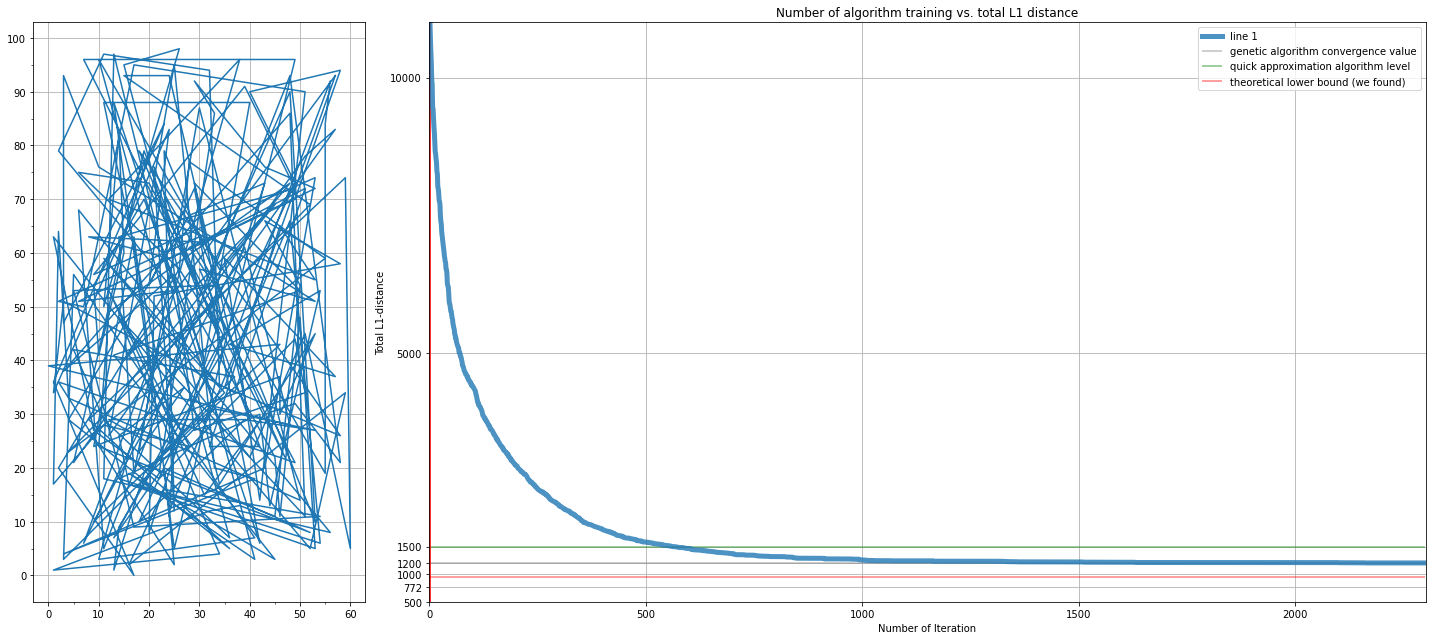

In [263]:
fig = frame_animation(0, record_1)
plt.show()
plt.close()

In [266]:
for fn in range(len(record_1[0])):
    if fn % 100 == 0:
        print(fn)
    fig = frame_animation(fn, record_1)
    fig.savefig(os.path.join('genetic_results','frame_combine{}.png'.format(fn+1)))
    plt.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [270]:
len(chromo_record_1)

2300

In [267]:
animation_lst = []
for i in range(len(chromo_record_1)):
    im = Image.open(os.path.join('genetic_results',
                                 'frame_combine{}.png'.format(i+1)))
    animation_lst.append(im)

In [271]:
# save image lst as GIF
# 2300 plots, finish in ___ seconds
animation_lst[0].save('out_combine1.gif', save_all=True,
                   append_images=animation_lst[1:], compress=False,
                   duration=1) # duration each frame in millisecond

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

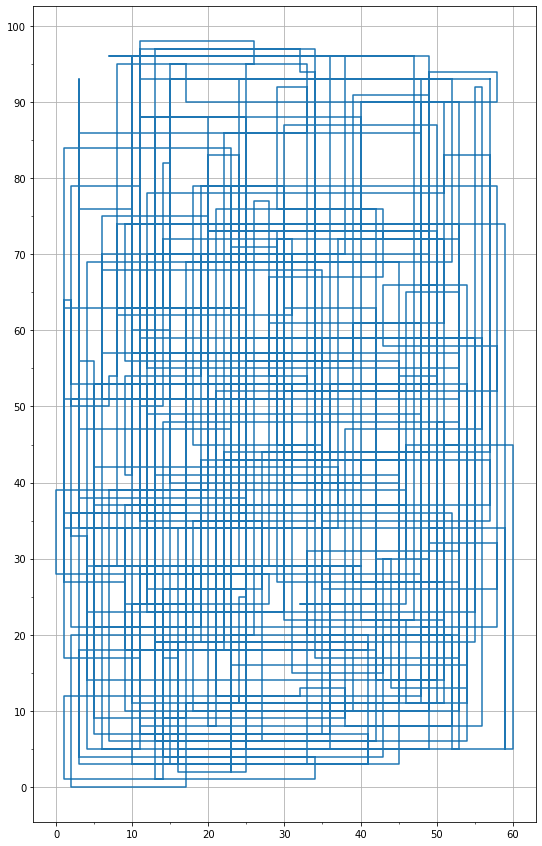

In [222]:
plot_given_solution(chromo_record_1[0])

# Save pictures for each iteration for a solution to generate GIF

In [12]:
import matplotlib.pyplot as plt

In [14]:
# os.getcwd()

In [15]:
# save each result
chromo_record_1 = rets[0][0]

for i, temp in enumerate(chromo_record_1):
    fig, ax = plot_given_solution(temp, draw_l1=False, annotate=False)
    fig.savefig(os.path.join('genetic_results','frame_{}.png'.format(i+1)))
    plt.close()

NameError: name 'rets' is not defined

In [22]:
from PIL import Image
import glob

In [21]:
# load every result and save again as gif
images_lst = [] 
for i in range(2300):
    im = Image.open(os.path.join(os.getcwd(), 'genetic_results','frame_combine{}.png'.format(i+1)))
    images_lst.append(im)

In [23]:
small_images_set = [im for i, im in enumerate(images_lst) if i % 10==0]
# save image lst as GIF
# 2300 plots, finish in 2300 seconds
small_images_set[0].save('out.gif', save_all=True,
                         append_images=small_images_set, compress=True,
                         duration=10) # duration each frame in millisecond


In [ ]:
# # filepaths
# fp_in = "/genetic_results/frame_combine*.png"
# fp_out = "/genetic_results/out.gif"

# img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
# img.save(fp=fp_out, format='GIF', append_images=imgs,
#          save_all=True, duration=200, loop=0)

In [ ]:
del images_lst

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

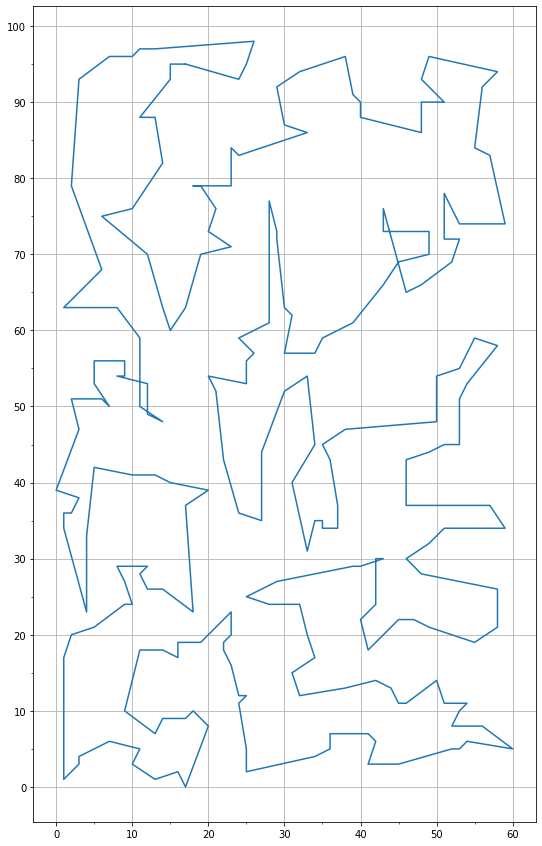

In [218]:
plot_given_solution(rets[0][0][-1], draw_l1=False, annotate=False)

In [72]:
for r in rets:
    print('...')
    print(r)

...
([array([161, 160, 162, 159, 158, 132, 134, 133, 131, 130, 111, 114, 115,
       113, 112,  86,  84,  83,  81,  79, 109, 108, 106, 107, 110, 128,
       129, 127, 126, 104, 105,  47,  78,  76,  77,  75,  74,  41,  44,
        43,  42,  40,  38,  39,  37,  36,  73,  68,  69,  71,  72,  70,
        61,  63,  31,  30,  93, 116, 136, 135, 139, 119, 120, 121, 123,
       144, 137, 138, 140, 141, 142, 143, 145, 171, 170, 168, 165, 166,
       167, 185, 184, 186, 169, 172, 189, 190, 188, 187, 208, 207, 206,
       225, 226, 227, 229, 228, 231, 232, 233, 234, 213, 214, 216, 217,
       237, 238, 239, 236, 235, 215, 219, 218, 212, 211, 230, 224, 223,
       222, 221, 220, 209, 210, 192, 191, 194, 195, 193, 197, 196, 201,
       202, 205, 204, 203, 183, 198, 200, 199, 182, 179, 181, 180, 178,
       177, 157, 156, 154, 152, 151, 150, 148, 176, 175, 174, 173, 155,
       153, 149, 146, 147, 124, 125, 103, 102, 101, 100,  99, 122, 118,
       117,  97,  96,  95,  94,  98,  62,  64,  66,  65,  

In [68]:
last_chromo[0] = r[0][0]
last_chromo[1] = r[1][0]

In [38]:
import concurrent.futures
import test

nums = [1,2,3,4,5,6,7,8,9,10]

# def f(x):
#     return x * x
def main():
    # Make sure the map and function are working
    print([val for val in map(test.ff, nums)])

    # Test to make sure concurrent map is working
    with concurrent.futures.ProcessPoolExecutor() as executor:
        print([val for val in executor.map(test.ff, nums)])

if __name__ == '__main__':
    main()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [306]:
best_score[:10]

[1202, 1202, 1202, 1202, 1202, 1202, 1202, 1202, 1202, 1202]

In [271]:
print(last_chromo[0])

[189 172 169 186 187 188 208 206 207 225 226 227 228 229 230 224 223 222
 221 220 184 185 167 166 165 168 170 171 145 143 142 141 140 138 137 144
 123 121 120 119 139 135 136 116  93  30  31  63  61  65  67  32  33  34
  35  36  37  39  38  40  43  42  13  12   9   4   3   2   1   0   7  11
  10   5   6   8  14  15  16  44  41  74  75  76  78  45  46  17  18  19
  21  22  20  23  24  26  27  29  28  25  58  59  60  91  92  90  88 112
 113 115 114 164 163 161 162 160 158 159 132 133 134 131 130 111 129 127
 126 128 104 110 106 107 108 109  79  81  83  86  84  82  80  50  52  85
  87  89  56  57  55  54  53  51  49  48  47 105  77  73  72  70  71  69
  68  66  64  62  98  94  95  96  97 117 118 122  99 100 101 102 103 125
 124 147 146 149 153 155 156 154 151 152 150 148 173 175 176 157 177 178
 180 181 179 182 199 200 198 196 197 202 201 183 203 204 205 219 218 215
 235 236 239 238 237 217 216 213 214 234 233 232 231 211 212 210 209 192
 190 193 195 194 174 191]


In [272]:
print(last_chromo[1])

[185 167 166 165 168 170 171 145 143 142 141 140 138 137 144 123 121 120
 119 139 135 136 116  93  30  31  63  61  65  67  32  33  34  35  36  37
  39  38  40  43  42  13  12   9   4   3   2   1   0   7  11  10   5   6
   8  14  15  16  44  41  74  75  76  78  45  46  17  18  19  21  22  20
  23  24  26  27  29  28  25  58  59  60  91  92  90  88 112 113 115 114
 164 163 161 160 162 158 159 132 133 134 131 130 111 129 127 126 128 104
 110 106 107 108 109  79  81  83  84  86  82  80  50  52  85  87  89  56
  57  55  54  53  51  49  48  47 105  77  73  72  70  71  69  68  66  64
  62  98  94  95  96  97 117 118 122  99 100 101 102 103 125 124 147 146
 149 153 155 156 154 152 151 150 148 173 175 176 157 177 178 181 180 179
 182 199 200 198 196 197 202 201 183 203 204 205 219 218 215 235 236 239
 238 237 217 216 213 214 234 233 232 231 211 212 209 210 192 190 193 195
 194 174 191 189 172 169 186 187 188 208 207 206 225 226 227 228 229 230
 224 223 222 221 220 184]


In [69]:
# best_chromo1 = last_last_chromo
X_best = [point_dict[i][0] for i in last_chromo[0]]
Y_best = [point_dict[i][1] for i in last_chromo[0]]
X_best.append(X_best[0])
Y_best.append(Y_best[0])

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

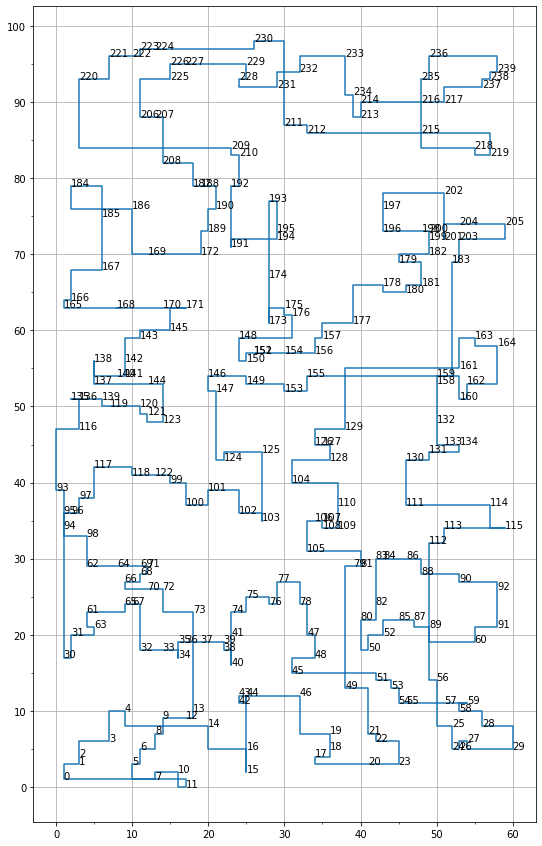

In [70]:
plot_trip(X_best, Y_best)

(<Figure size 648x1080 with 1 Axes>, <AxesSubplot:>)

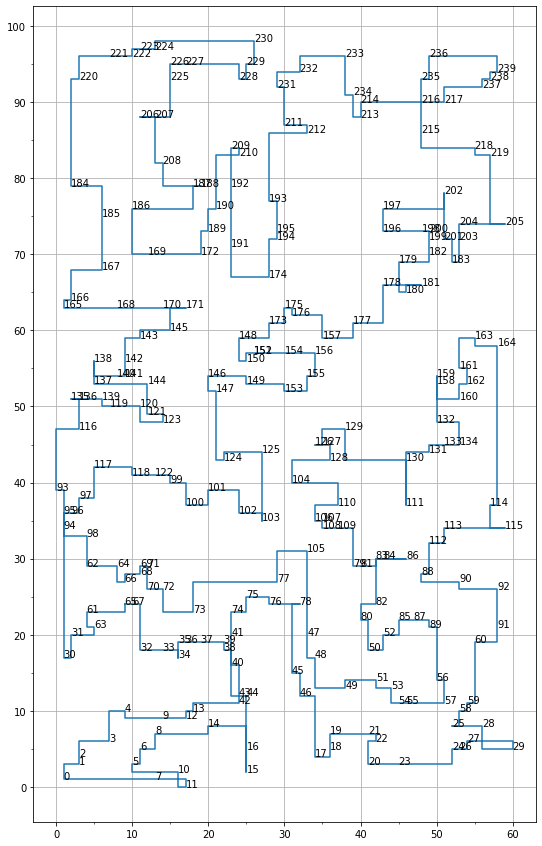

In [269]:
plot_trip(X_best, Y_best)

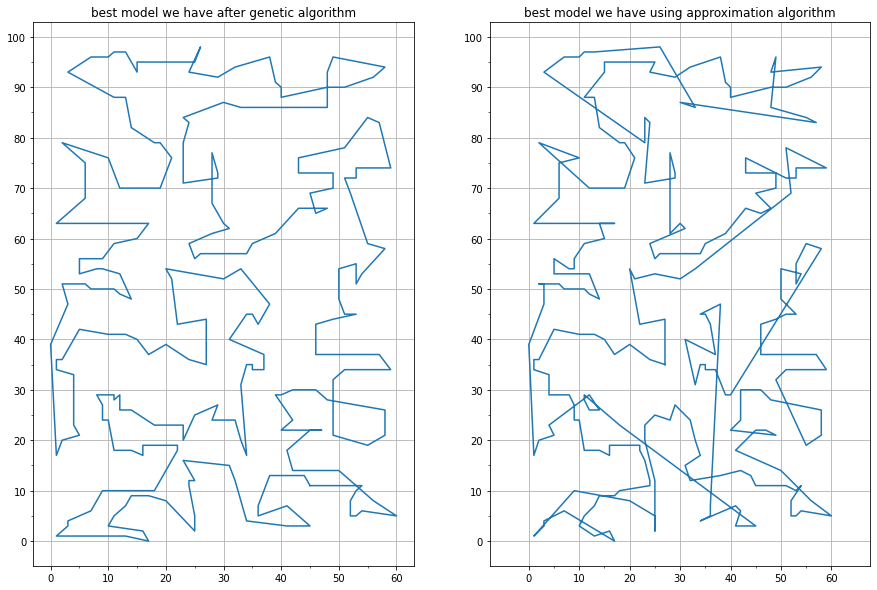

In [243]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
ax = axs[0]
# plt.subplot(1, 2, 1)
ax.plot(X_best, Y_best, '-')
ax.set_xticks(np.arange(0, 61, 10))
ax.set_xticks(np.arange(0, 61, 5), minor=True)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.set_xticks(np.arange(0, 61, 10))
ax.set_xticks(np.arange(0, 61, 5), minor=True)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.grid()
ax.set_title('best model we have after genetic algorithm')
plt.axis('equal')

ax = axs[1]
# plt.subplot(1, 2, 2)
ax.plot(X_mst, Y_mst, '-')
ax.set_xticks(np.arange(0, 61, 10))
ax.set_xticks(np.arange(0, 61, 5), minor=True)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.set_xticks(np.arange(0, 61, 10))
ax.set_xticks(np.arange(0, 61, 5), minor=True)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.set_title('best model we have using approximation algorithm')

ax.grid()
plt.axis('equal')
plt.show()

There are many crossovers in travel path. However, the L1 distance (Manhattan distance) stays the same whether we fix the crossovers or not.

If using L2 distance (ecludian distance), we need to fix the crossovers using genetic algorithm or manually.

In [ ]:
sd = get_path_length(best_chromo[-1])
sd_approx = get_path_length(mst_approx_plan[10])
lb = get_path_length(mst_approx_plan[21])/2
print('shortest distance', sd)
print('approximation algorithm shortest distance', sd_approx)
print('theoretical lower bound be algorithm', lb)
print('The result is at most {:.2f} times the global optimal plan'.format(sd / lb))